# Interpolation

In [46]:
import numpy as np
np.set_printoptions(precision=2, linewidth=65)

import matplotlib.pyplot as plt
plt.rc('figure', dpi=150)

import seaborn as sns
sns.set()
sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})

import scipy

Bei der Bildung der Ober- und Untersumme wurde die zu integrierende Funktion durch einen konstanten Wert in den Teilintervallen zwischen den Stützstellen angenähert. Eine genauere Berechnung des Integrals kann durch eine bessere Interpolation erfolgen. Dazu eignen sich  Polynome, da diese leicht zu Integrieren sind.   

## Trapezregel

Die Trapezregel beruht auf der Annäherung der zu integrierenden Funktion durch Geraden, d.h. Polynome vom Grad 1, auf den Teilintervallen. Die Approximation des Integralwertes ergibt sich entsprechend aus den Flächeninhalten der so entstandenen Trapeze.

Wie im vorhergehenden Kapitel wird das Verfahren anhand folgender Funktion demonstriert

$$ \sf I = \int_0^2\sin(3x) + 2x \ dx $$

In [66]:
def fkt(x):
    return np.sin(3*x) + 2*x

# Daten für die Visualisierung
x = np.linspace(0, 2, 100)
y = fkt(x)

# Exakte Lösung
I_exakt = (-1/3*np.cos(3*2) + 2**2) - (-1/3)

Bildung der Stützpunkte:

In [49]:
n = 5

xi = np.linspace(0, 2, n)
yi = fkt(xi)

Zunächst erfolgt noch die Visualisierung des Verfahrens.

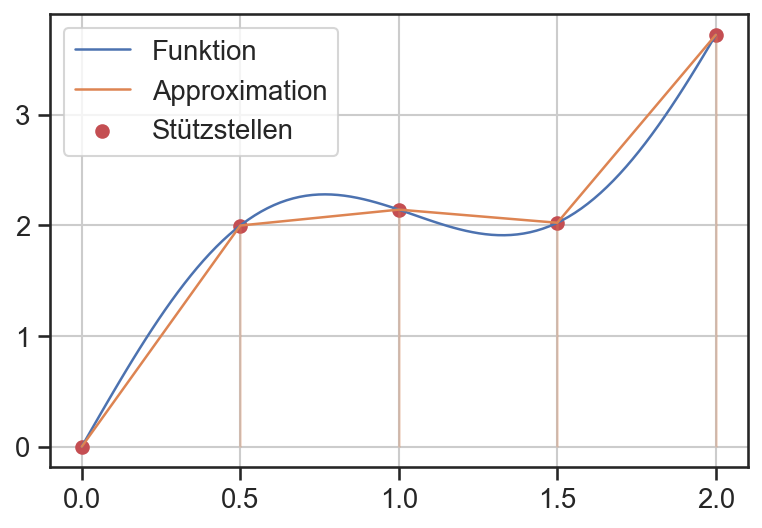

In [50]:
plt.plot(x, y, label='Funktion')
plt.scatter(xi, yi, label='Stützstellen', c='C3')
plt.plot(xi, yi, label='Approximation', c='C1')

plt.vlines(xi, ymin=0, ymax=yi, color='C1', alpha=0.3)

plt.grid()
plt.legend();

Die Integration selbst kann mittels der [Funktion `scipy.integrate.trapz`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapz.html#scipy.integrate.trapz) ausgeführt werden.

In [55]:
res = scipy.integrate.trapz(yi, xi)
print(f"Integralwert mit {n} Stützstellen: {res:.4f}")

Integralwert mit 5 Stützstellen: 4.0107


Der so ermittelte Wert nähert sich dem exakten Wert mit zunehmender Anzahl der Stützstellen.

In [70]:
n_max = 50
ns = np.arange(2, n_max, 1, dtype=np.int)
tr = np.zeros(len(ns))

for i, n in enumerate(ns):
    xi = np.linspace(0, 2, n)
    yi = fkt(xi)
    tr[i] = scipy.integrate.trapz(yi, xi)

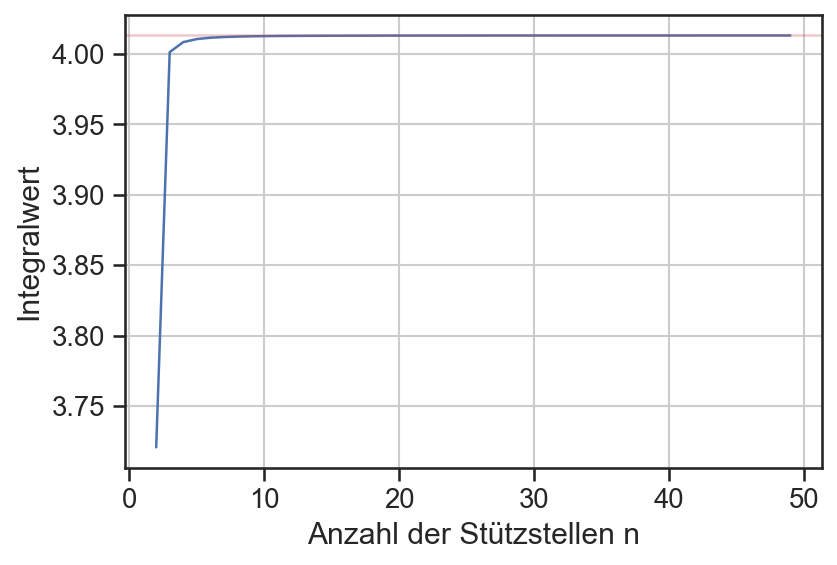

In [74]:
plt.plot(ns, tr)
plt.axhline(y=I_exakt, color='C3', alpha=0.3)

plt.xlabel('Anzahl der Stützstellen n')
plt.ylabel('Integralwert')

plt.grid();

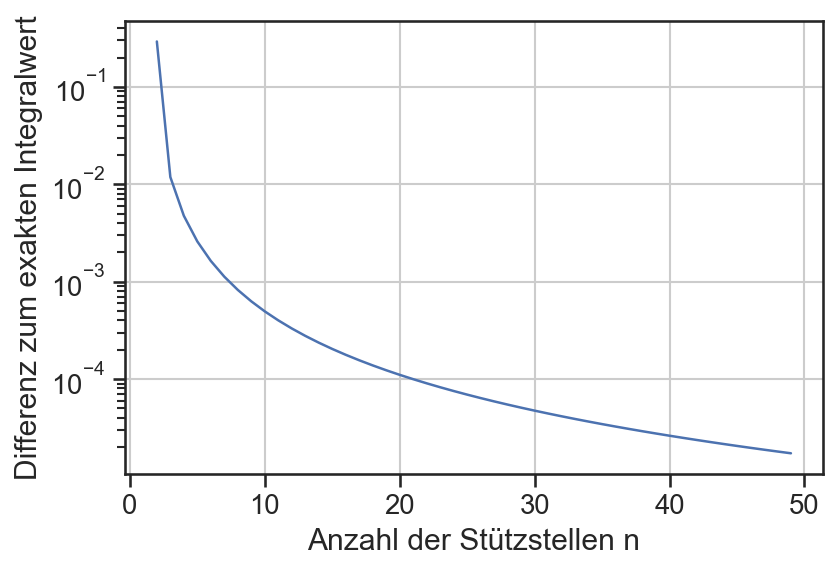

In [76]:
plt.plot(ns, np.abs(tr-I_exakt))

plt.xlabel('Anzahl der Stützstellen n')
plt.ylabel('Differenz zum exakten Integralwert')

# plt.xscale('log')
plt.yscale('log')

plt.grid();

## Simpsonregel

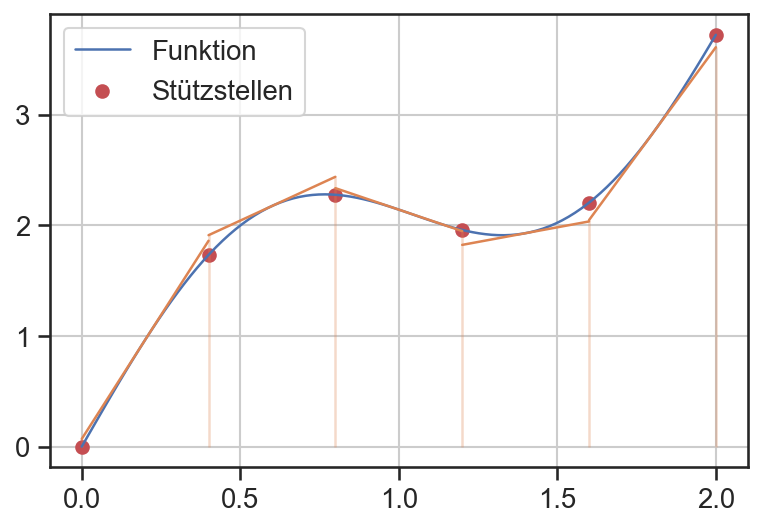

In [32]:
plt.plot(x, y, label='Funktion')
plt.scatter(xi, yi, label='Stützstellen', c='C3')
# plt.step(xi, oben, where='post')
# plt.step(xi, unten, where='post')
# plt.plot(xi, yi, label='Approximation')

tr_ys = []

for i in range(n-1):
    dx = xi[i+1] - xi[i]
    cx = (xi[i] + xi[i+1]) / 2
    cs = fkt_der(cx)
    cy = fkt(cx)
    y1 = cy - dx/2*cs
    y2 = cy + dx/2*cs
    tr_ys.append([y1, y2])
    plt.plot([xi[i], xi[i+1]], [y1, y2], color='C1')

y_max = []
y_max.append(tr_ys[0][0])
for i in range(1, n-1):
    if tr_ys[i][0] > tr_ys[i-1][1]:     
        y_max.append(tr_ys[i][0])
    else:
        y_max.append(tr_ys[i-1][1])
y_max.append(tr_ys[-1][1])

plt.vlines(xi, ymin=0, ymax=y_max, color='C1', alpha=0.3)

plt.grid()
plt.legend();

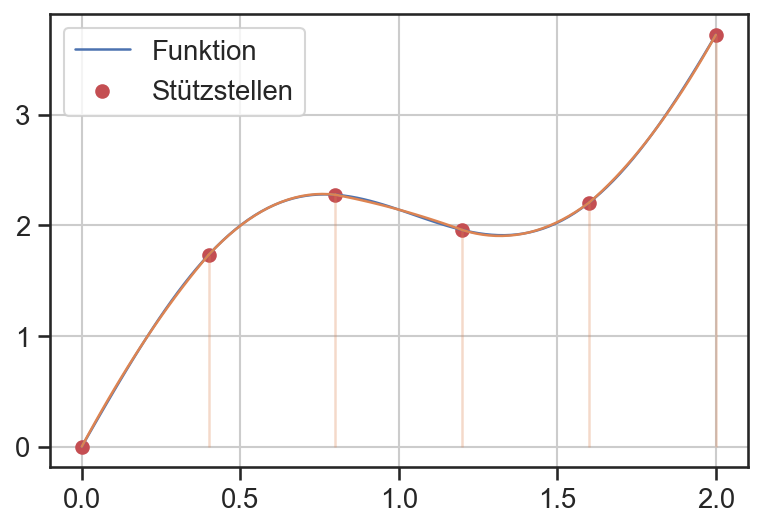

In [36]:
plt.plot(x, y, label='Funktion')
plt.scatter(xi, yi, label='Stützstellen', c='C3')
# plt.step(xi, oben, where='post')
# plt.step(xi, unten, where='post')
# plt.plot(xi, yi, label='Approximation')

for i in range(n-1):
    dx = xi[i+1] - xi[i]
    cx = (xi[i] + xi[i+1]) / 2
    cy = fkt(cx)

    P = np.polyfit([xi[i], cx, xi[i+1]], [yi[i], cy, yi[i+1]], 2)
    
    Px = np.linspace(xi[i], xi[i+1], 20)
    Py = np.polyval(P, Px)
    
    plt.plot(Px, Py, color='C1')

y_max = []
y_max.append(tr_ys[0][0])
for i in range(1, n-1):
    if tr_ys[i][0] > tr_ys[i-1][1]:     
        y_max.append(tr_ys[i][0])
    else:
        y_max.append(tr_ys[i-1][1])
y_max.append(tr_ys[-1][1])

plt.vlines(xi, ymin=0, ymax=yi, color='C1', alpha=0.3)

plt.grid()
plt.legend();